# Unit 5 - Financial Planning

In [13]:
# Initial imports
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import yfinance as yahooFinance
import datetime
import json
%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [14]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [15]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [45]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_url = btc_url + "?format=json"
btc_data = requests.get(btc_url)
btc_content = btc_data.content
data = btc_data.json()
print(json.dumps(data, indent=4))

# Fetch current ETH price
# YOUR CODE HERE!
eth_url = eth_url + "?format=json"
eth_data = requests.get(eth_url)
eth_content = eth_data.content
data1 = eth_data.json()
print(json.dumps(data1, indent=4))

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = data['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = data1['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19248556,
            "total_supply": 19248556,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 16574.8,
                    "volume_24h": 13103037174,
                    "market_cap": 318974953082,
                    "percentage_change_1h": -0.014090901947848,
                    "percentage_change_24h": 0.205782285261349,
                    "percentage_change_7d": -1.2902749163162,
                    "percent_change_1h": -0.014090901947848,
                    "percent_change_24h": 0.205782285261349,
                    "percent_change_7d": -1.2902749163162
                }
            },
            "last_updated": 1672517947
        }
    },
    "metadata": {
        "timestamp": 1672517947,
        "num_cry

###Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [69]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [70]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
agg_info = yahooFinance.Ticker("AGG")
print(agg_info.info)
# Create the Alpaca API object
# YOUR CODE HERE!
spy_info = yahooFinance.Ticker("SPY")
print(spy_info.info)

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': '', 'trailingPegRatio': None}
{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': '', 'trailingPegRatio': None}


In [71]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
data = yahooFinance.download(tickers, start_date, end_date)['Adj Close']
asset = pd.DataFrame(data)
asset

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

[*********************100%***********************]  2 of 2 completed


,AGG,SPY
Date,,
2022-01-03,110.743866,470.083679
2022-01-04,110.734108,469.926239
2022-01-05,110.391991,460.902649
2022-01-06,110.274689,460.469666
2022-01-07,109.952156,458.649200
...,...,...
2022-12-23,97.970001,382.910004
2022-12-27,97.260002,381.399994
2022-12-28,97.089996,376.660004


In [72]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = 96.989998
spy_close_price = 382.429993
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.989998
Current SPY closing price: $382.429993


In [73]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19121.50
The current value of your 200 AGG shares is $19398.00


### Savings Health Analysis

In [80]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
savings_data = {'Amount' : [106407.569394 , 37516.5]}

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(savings_data, index = ['crypto' , 'shares'])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,106407.569394
shares,37516.500000


<AxesSubplot:ylabel='Amount'>

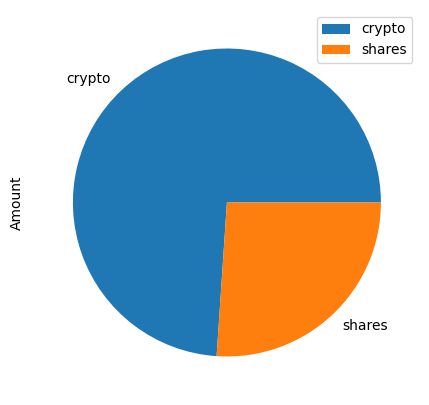

In [85]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y = 'Amount' , figsize = (5,5))

In [95]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
y=0

# Calculate total amount of savings
# YOUR CODE HERE!
for x in savings_data['Amount']:
    y  = x + y
    
# Validate saving health
# YOUR CODE HERE!
if y < emergency_fund:
    x = emergency_fund - y
    print(f"You need ${x} to reach your financial goal")
elif y > emergency_fund:
    print("Congratulations, you have enough money in this fund")
elif y == emergency_fund:
    print("Congratulations, you have reached your financial goal")


Congratulations, you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [136]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
agg_info = yahooFinance.Ticker("AGG")

spy_info = yahooFinance.Ticker("SPY")
start_date = datetime.datetime(2017, 5, 10)
end_date = datetime.datetime(2022, 5, 10)


agg_data = pd.DataFrame(yahooFinance.download("AGG", start_date, end_date))
spy_data = pd.DataFrame(yahooFinance.download("SPY", start_date, end_date))



# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
agg_data.drop(columns=['Adj Close'], inplace=True)
spy_data.drop(columns=['Adj Close'], inplace=True)
columns = ["Open" , "High" , "Low" , "close" , "Volume"]
agg_data.columns = columns
spy_data.columns = columns


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
combined_df = pd.concat([agg_data , spy_data] , axis = 1 , keys = ["AGG" , "SPY"])
# Display sample data
combined_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AGG                                               \
                  Open        High         Low       close   Volume   
Date                                                                  
2017-05-10  108.599998  108.660004  108.440002  108.529999  1653400   
2017-05-11  108.349998  108.540001  108.339996  108.519997  2331000   
2017-05-12  108.809998  108.940002  108.779999  108.919998  1329700   
2017-05-15  108.849998  108.940002  108.820000  108.879997  1771000   
2017-05-16  108.879997  109.099998  108.879997  109.019997  2051800   

                   SPY                                                
                  Open        High         Low       close    Volume  
Date                                                                  
2017-05-10  239.389999  239.869995  239.149994  239.869995  54293800  
2017-05-11  239.350006  239.570007  238.130005  239.380005  62358300  
2017-05-12  239.089996  239.429993  238.669998  238.979996  53912700  
2017-05-15  239.470001  240.440002  239.449997  240.300003  61918900  
2017-05-16  240.639999  240.669998  239.630005  240.080002  51241800

In [137]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_sim = MCSimulation(
    portfolio_data = combined_df,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [139]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_sim.portfolio_data.head()

AGG                                               \
                  Open        High         Low       close   Volume   
Date                                                                  
2017-05-10  108.599998  108.660004  108.440002  108.529999  1653400   
2017-05-11  108.349998  108.540001  108.339996  108.519997  2331000   
2017-05-12  108.809998  108.940002  108.779999  108.919998  1329700   
2017-05-15  108.849998  108.940002  108.820000  108.879997  1771000   
2017-05-16  108.879997  109.099998  108.879997  109.019997  2051800   

                                SPY                                      \
           daily_return        Open        High         Low       close   
Date                                                                      
2017-05-10          NaN  239.389999  239.869995  239.149994  239.869995   
2017-05-11    -0.000092  239.350006  239.570007  238.130005  239.380005   
2017-05-12     0.003686  239.089996  239.429993  238.669998  238.979996   
2017-05-15    -0.000367  239.470001  240.440002  239.449997  240.300003   
2017-05-16     0.001286  240.639999  240.669998  239.630005  240.080002   

                                   
              Volume daily_return  
Date                               
2017-05-10  54293800          NaN  
2017-05-11  62358300    -0.002043  
2017-05-12  53912700    -0.001671  
2017-05-15  61918900     0.005524  
2017-05-16  51241800    -0.000916

In [140]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


E:\FinTech_BootCamp\Module_5_API\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996350,1.017737,1.003060,1.003542,1.010969,0.994075,0.998227,1.009540,1.008154,1.004958,...,1.001957,0.992986,1.000229,1.001634,1.000326,1.004450,0.998351,0.996005,1.013313,1.002977
2,1.001908,1.005791,1.023699,0.994497,1.024259,0.992350,0.995720,1.008617,1.014816,1.021333,...,1.012144,0.987070,1.013488,0.993098,0.990183,1.016392,1.001647,1.004674,1.021112,0.992781
3,1.006881,0.999303,1.023467,0.992991,1.035990,0.992619,0.982725,1.015068,1.011010,1.010417,...,1.005874,0.982804,1.009273,0.978893,0.998260,1.020236,1.008206,1.004632,1.034915,0.985061
4,0.994348,0.987238,1.015299,0.997903,1.027411,0.997069,0.978922,1.017927,1.007923,1.012906,...,1.008041,0.976049,1.009430,0.989683,1.000849,1.027300,1.004206,0.999546,1.033148,0.978197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.155409,3.605229,11.026097,8.961326,4.788125,4.035790,1.498352,6.820119,3.264687,1.401235,...,3.149581,9.791626,7.022340,8.439054,5.615091,4.039388,2.310319,1.538881,3.143554,7.385281
7557,7.196862,3.625535,11.036381,9.008012,4.749673,4.071376,1.480405,6.838057,3.255947,1.373241,...,3.119118,9.815231,7.062652,8.428417,5.576660,4.075758,2.356516,1.553394,3.126960,7.445585
7558,7.237564,3.649967,11.116350,8.986494,4.748312,4.086284,1.481384,6.879997,3.236809,1.376664,...,3.111191,9.773774,7.088231,8.430309,5.640674,4.066815,2.357040,1.534317,3.132529,7.452032
7559,7.263468,3.626680,11.044206,9.042575,4.790643,4.057429,1.459566,6.858670,3.207585,1.385031,...,3.110374,9.721373,7.107217,8.471266,5.674470,4.063522,2.373523,1.540024,3.163401,7.485906


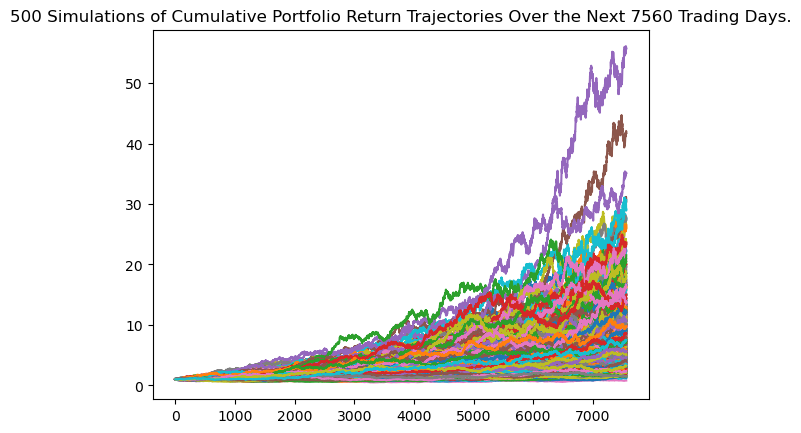

In [141]:
# Plot simulation outcomes
# YOUR CODE HERE!
projection_graph = mc_sim.plot_simulation() 

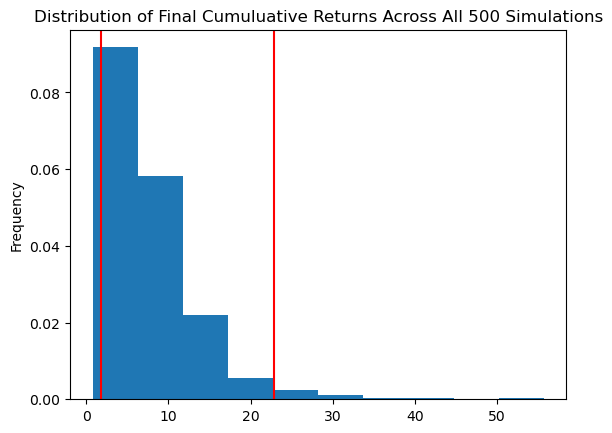

In [143]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
prob_distribution_plot = mc_sim.plot_distribution()

### Retirement Analysis

In [144]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats = mc_sim.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_stats)

count           500.000000
mean              7.732010
std               5.780885
min               0.796644
25%               4.006089
50%               6.230395
75%               9.882468
max              55.711141
95% CI Lower      1.753748
95% CI Upper     22.842807
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [146]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
lower_ci = round(summary_stats[8]*initial_investment,2)
upper_ci = round(summary_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $35074.96 and $456856.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [147]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
lower_ci = round(summary_stats[8]*initial_investment,2)
upper_ci = round(summary_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $52612.44 and $685284.2


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


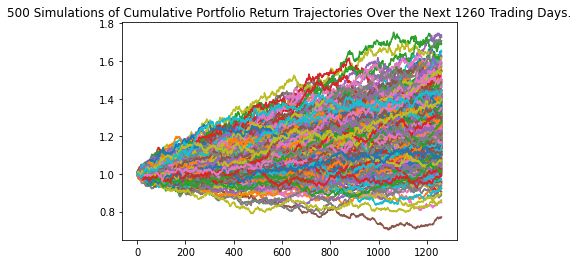

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

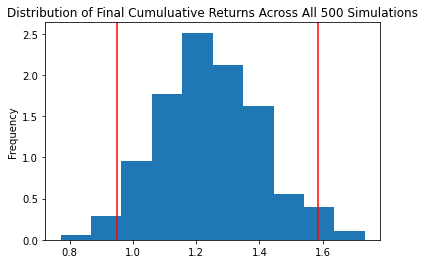

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


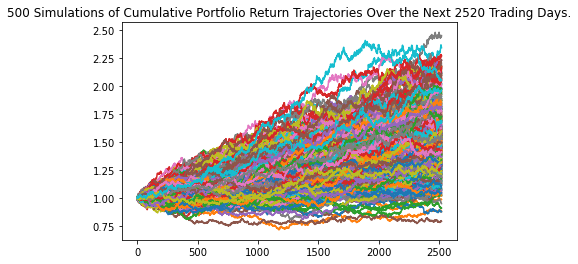

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

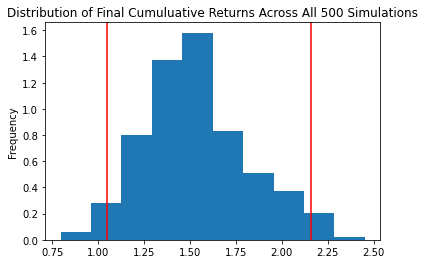

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
